<a href="https://colab.research.google.com/github/fantasybarry/MSFT-Prediction/blob/main/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
!pip install yfinance # uncomment these to install missing packages if they are not already installed
!pip install pandas

10292.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


10298.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [42]:
import yfinance as yf
import pandas as pd

def get_price(tick,start='2022-10-01',end=None):
    return yf.Ticker(tick).history(start=start,end=end)['Close']

def get_prices(tickers,start='2022-10-01',end=None):
    df=pd.DataFrame()
    for s in tickers:
        df[s]=get_price(s,start,end)
    return df

# Prepare training and testing data sets

In [43]:
feature_stocks=['tsla','meta','goog','amzn','nflx','gbtc','gdx','intc','dal','c']
predict_stock='msft'

# training set
start_date_train='2023-1-01'
end_date_train='2024-6-30'
X_train = get_prices(feature_stocks, start_date_train, end = end_date_train)
y_train=get_prices([predict_stock],start=start_date_train,end=end_date_train)

# testing set
start_date_test='2024-11-01'
end_date_test='2024-12-31'
X_test=get_prices(feature_stocks,start=start_date_test,end=end_date_test)
y_test=get_prices([predict_stock],start=start_date_test,end=end_date_test)

In [44]:
X_test


,tsla,meta,goog,amzn,nflx,gbtc,gdx,intc,dal,c
Date,,,,,,,,,,
2024-11-01 00:00:00-04:00,248.979996,566.702881,172.454346,197.929993,756.099976,55.009998,39.387589,23.200001,58.389999,62.715710
2024-11-04 00:00:00-05:00,242.839996,560.228088,170.486572,195.779999,755.510010,53.490002,39.437012,22.520000,56.889999,61.921215
2024-11-05 00:00:00-05:00,251.440002,571.968628,171.215759,199.500000,763.909973,55.169998,39.644573,23.320000,58.290001,63.232136
2024-11-06 00:00:00-05:00,288.529999,571.588928,178.127914,207.089996,780.210022,60.599998,38.191631,25.049999,62.320000,68.555275
2024-11-07 00:00:00-05:00,296.910004,591.223145,182.073441,210.050003,796.539978,60.880001,39.110840,26.230000,60.430000,67.641602
2024-11-08 00:00:00-05:00,321.220001,588.865051,179.656189,208.179993,795.039978,61.049999,38.567223,26.200001,61.049999,68.158028
2024-11-11 00:00:00-05:00,350.000000,582.699951,181.763794,206.839996,805.440002,69.220001,36.303795,25.049999,63.560001,69.319984
2024-11-12 00:00:00-05:00,328.489990,584.348633,183.112274,208.910004,819.500000,71.230003,35.690987,24.160000,64.050003,68.545341
2024-11-13 00:00:00-05:00,330.239990,579.532532,180.285477,214.100006,830.469971,71.309998,35.147369,24.920000,64.459999,68.416237


In [45]:
y_train

,msft
Date,
2023-01-03 00:00:00-05:00,235.240005
2023-01-04 00:00:00-05:00,224.949875
2023-01-05 00:00:00-05:00,218.282852
2023-01-06 00:00:00-05:00,220.855377
2023-01-09 00:00:00-05:00,223.005737
...,...
2024-06-24 00:00:00-04:00,445.079468
2024-06-25 00:00:00-04:00,448.340454
2024-06-26 00:00:00-04:00,449.543457


# Convert training and testing data into numpy array

In [46]:
import numpy as np

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)


# Use linear regression to predict msft stock price from the other stocks' prices

## 1. Append a dummy feature to both X_train and X_test

In [47]:
# Dummy feature for X_train
# Your solution here
X_train = get_prices(feature_stocks, start = start_date_train, end = end_date_train)

# Create dummy features for each stock based on whether the price is above the mean
for stock in X_train.columns:  # Assuming 'c' is the last stock column
    mean_price = X_train[stock].mean()
    X_train[f'{stock}_dummy'] = (X_train[stock] > mean_price).astype(int)

# Display the modified dataset
print(X_train.head(None))
 

                                 tsla        meta        goog        amzn  \
Date                                                                        
2023-01-03 00:00:00-05:00  108.099998  124.265312   89.378845   85.820000   
2023-01-04 00:00:00-05:00  113.639999  126.885315   88.392403   85.139999   
2023-01-05 00:00:00-05:00  110.339996  126.456947   86.459343   83.120003   
2023-01-06 00:00:00-05:00  113.059998  129.525223   87.844376   86.080002   
2023-01-09 00:00:00-05:00  119.769997  128.977310   88.482079   87.360001   
...                               ...         ...         ...         ...   
2024-06-24 00:00:00-04:00  182.580002  498.032776  180.347717  185.570007   
2024-06-25 00:00:00-04:00  187.350006  509.702240  185.126007  186.339996   
2024-06-26 00:00:00-04:00  196.369995  512.217773  184.916504  193.610001   
2024-06-27 00:00:00-04:00  197.419998  518.646423  186.402878  197.850006   
2024-06-28 00:00:00-04:00  197.880005  503.333435  182.971283  193.250000   

In [48]:
# Dummy Feature for X_test
# Load the dataset
X_test = get_prices(feature_stocks, start = start_date_test, end = end_date_test)

# Create dummy features for each stock based on whether the price is above the mean
for stock in X_test.columns:  # Assuming 'c' is the last stock column
    mean_price = X_test[stock].mean()
    X_test[f'{stock}_dummy'] = (X_test[stock] > mean_price).astype(int)

# Display the modified dataset
print(X_test.head(None))

                                 tsla        meta        goog        amzn  \
Date                                                                        
2024-11-01 00:00:00-04:00  248.979996  566.702881  172.454346  197.929993   
2024-11-04 00:00:00-05:00  242.839996  560.228088  170.486572  195.779999   
2024-11-05 00:00:00-05:00  251.440002  571.968628  171.215759  199.500000   
2024-11-06 00:00:00-05:00  288.529999  571.588928  178.127914  207.089996   
2024-11-07 00:00:00-05:00  296.910004  591.223145  182.073441  210.050003   
2024-11-08 00:00:00-05:00  321.220001  588.865051  179.656189  208.179993   
2024-11-11 00:00:00-05:00  350.000000  582.699951  181.763794  206.839996   
2024-11-12 00:00:00-05:00  328.489990  584.348633  183.112274  208.910004   
2024-11-13 00:00:00-05:00  330.239990  579.532532  180.285477  214.100006   
2024-11-14 00:00:00-05:00  311.179993  576.694824  177.149033  211.479996   
2024-11-15 00:00:00-05:00  320.720001  553.633423  173.692947  202.610001   

## 2. Find the best linear regression model based on your training data ($w=(X X')^{-1} X y$)
### Note that you may need to transpose the matrices to make things work



### We expect w = $(X_{train}X_{train}^T)^{-1}X_{train}y_{train}$ at the optimum

In [49]:
# Your solution here
import numpy as np

X_train = get_prices(feature_stocks, start_date_train, end_date_train)

predict_stock = 'msft'
y_train = get_prices([predict_stock], start_date_train, end_date_train).squeeze()

common_dates = X_train.index.intersection(y_train.index)
X_train = X_train.loc[common_dates]
y_train = y_train.loc[common_dates]

# Add a column of 1s for the intercept term
X = np.column_stack([np.ones(len(X_train)), X_train.values])

# Compute weights using the normal equation
X_transpose = X.T
XTX_inv = np.linalg.pinv(X_transpose @ X)  # Pseudo-inverse for numerical stability
w = XTX_inv @ X_transpose @ y_train.values

# Extract coefficients (intercept + feature weights)
intercept = w[0]
coefficients = w[1:]

# Predictions
y_pred = X @ w

# Calculate R-squared (model performance)
ss_res = np.sum((y_train - y_pred) ** 2)
ss_tot = np.sum((y_train - np.mean(y_train)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"Intercept: {intercept:.4f}")
print(f"Coefficients: {dict(zip(feature_stocks, coefficients.round(4)))}")
print(f"R-squared: {r_squared:.4f}")


Intercept: 16.5294
Coefficients: {'tsla': np.float64(0.1757), 'meta': np.float64(0.2612), 'goog': np.float64(0.3456), 'amzn': np.float64(0.3001), 'nflx': np.float64(0.1974), 'gbtc': np.float64(-0.4846), 'gdx': np.float64(2.334), 'intc': np.float64(0.6901), 'dal': np.float64(-1.8977), 'c': np.float64(0.5018)}
R-squared: 0.9771


### Linear Regression Plot


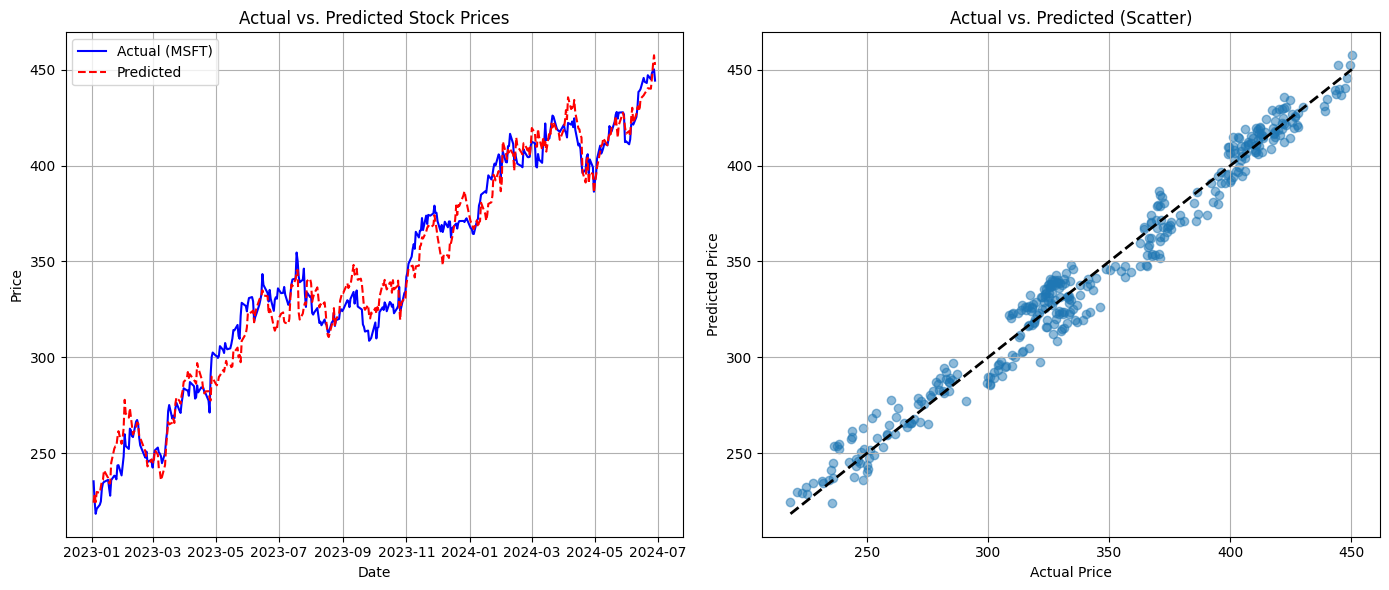

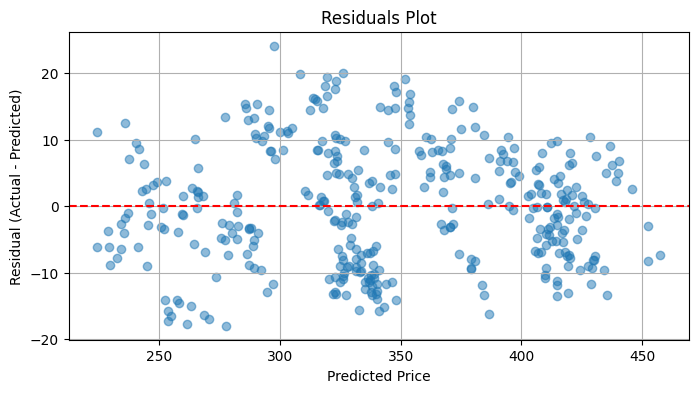

In [50]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values over time
plt.figure(figsize=(14, 6))

# Time series plot
plt.subplot(1, 2, 1)
plt.plot(X_train.index, y_train, label='Actual (MSFT)', color='blue')
plt.plot(X_train.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Scatter plot of actual vs. predicted
plt.subplot(1, 2, 2)
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # 45-degree line
plt.title('Actual vs. Predicted (Scatter)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

plt.tight_layout()
plt.show()

# Residuals plot (errors)
residuals = y_train - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.show()

## 3. Report your training and testing error
### How far your prediction from the actual price. Compute the mean square error for both training and testing

#### Preparing the testing data(modification)

In [51]:
# Your solution here

start_date_test='2024-11-01'
end_date_test='2024-12-31'

# Fetch testing data
X_test = get_prices(feature_stocks, start_date_test, end_date_test)
y_test = get_prices([predict_stock], start_date_test, end_date_test).squeeze()

# Align dates
common_dates_test = X_test.index.intersection(y_test.index)
X_test = X_test.loc[common_dates_test]
y_test = y_test.loc[common_dates_test]

# Add intercept term to testing data
X_test_design = np.column_stack([np.ones(len(X_test)), X_test.values])


#### Compute predictions


In [52]:
y_pred_train = X @ w  
y_pred_test = X_test_design @ w  

#### Compute Mean squared error


In [54]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Training MSE
mse_train = mean_squared_error(y_train, y_pred_train)

# Testing MSE
mse_test = mean_squared_error(y_test, y_pred_test)

print("=== Training vs. Testing MSE ===")
print(f"Training MSE(mean square error): {mse_train:.4f}")
print(f"Testing MSE(mean square error):  {mse_test:.4f}")

=== Training vs. Testing MSE ===
Training MSE(mean square error): 79.9055
Testing MSE(mean square error):  7940.0156


In [55]:
# Baseline model (predict mean of y_train)
y_baseline = np.mean(y_train) * np.ones_like(y_test)
mse_baseline = mean_squared_error(y_test, y_baseline)

print(f"\nBaseline MSE (Mean Prediction): {mse_baseline:.4f}")


Baseline MSE (Mean Prediction): 7433.4069


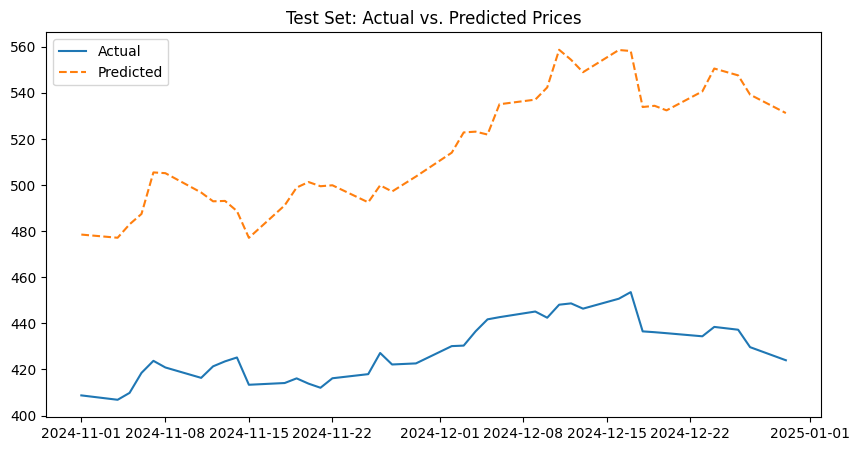

In [56]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_test, label='Predicted', linestyle='--')
plt.title('Test Set: Actual vs. Predicted Prices')
plt.legend()
plt.show()

#### A significant overfitting occurs. Use lasso regression for regularization.

##### Standardize Features

In [57]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Training data
X_train = get_prices(feature_stocks, start_date_train, end_date_train)
y_train = get_prices([predict_stock], start_date_train, end_date_train).squeeze()

# Testing data (adjust dates as needed)
X_test = get_prices(feature_stocks, start_date_test, end_date_test)
y_test = get_prices([predict_stock], start_date_test, end_date_test).squeeze()

# Align dates
common_dates_train = X_train.index.intersection(y_train.index)
X_train = X_train.loc[common_dates_train]
y_train = y_train.loc[common_dates_train]
 


##### Hyperparameter Tuning

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)    

##### Train Lasso Model with Best Alpha

In [59]:

# Define a range of alphas to test
alphas = np.logspace(0, 1, 100)  

# Train LassoCV model
lasso_model = LassoCV(alphas=alphas, cv=10, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Best alpha from cross-validation
best_alpha = lasso_model.alpha_
print(f"Best alpha (λ): {best_alpha:.4f}")


Best alpha (λ): 1.0000


##### Evaluate Training and Testing MSE(After regularization)

In [60]:

y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Mean Squared Error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"\nTraining MSE: {mse_train:.4f}")
print(f"Testing MSE: {mse_test:.4f}")


Training MSE: 105.5313
Testing MSE: 2085.9863


In [61]:
# Feature coefficients (standardized scale)
coefficients = lasso_model.coef_

print("\n=== Model Coefficients ===")
for stock, coef in zip(feature_stocks, coefficients):
    print(f"{stock}: {coef:.4f}")

# Number of features retained (non-zero coefficients)
non_zero = sum(coefficients != 0)
print(f"\nNon-zero coefficients: {non_zero}/{len(coefficients)}")


=== Model Coefficients ===
tsla: 1.4152
meta: 28.6413
goog: 14.6854
amzn: 0.0000
nflx: 10.2608
gbtc: 0.0000
gdx: 1.7307
intc: 7.9075
dal: -0.0000
c: 0.0000

Non-zero coefficients: 6/10


# Prediction for MSFT stocks using Neural Networks

## a. Split the stock price data into training, validation and test datasets.

In [62]:
# training set
start_date_train='2023-1-01'
end_date_train='2024-6-30'

X_train=get_prices(feature_stocks,start=start_date_train,end=end_date_train)
y_train=get_prices([predict_stock],start=start_date_train,end=end_date_train)

# testing set
start_date_test='2024-11-01' 
end_date_test='2025-1-01'
X_test=get_prices(feature_stocks,start=start_date_test,end=end_date_test)
y_test=get_prices([predict_stock],start=start_date_test,end=end_date_test)

# validating set
start_date_validate = '2024-7-01'
end_date_validate = '2024-11-01'
X_validate = get_prices(feature_stocks, start = start_date_validate, end = end_date_validate)
y_validate = get_prices([predict_stock], start = start_date_validate, end = end_date_validate)

X_train


,tsla,meta,goog,amzn,nflx,gbtc,gdx,intc,dal,c
Date,,,,,,,,,,
2023-01-03 00:00:00-05:00,108.099998,124.265312,89.378845,85.820000,294.950012,8.200000,28.842234,25.775146,32.105251,41.898052
2023-01-04 00:00:00-05:00,113.639999,126.885315,88.392403,85.139999,309.410004,8.380000,30.067492,26.691208,33.857697,42.977993
2023-01-05 00:00:00-05:00,110.339996,126.456947,86.459343,83.120003,309.700012,8.450000,29.804935,26.575497,34.684692,42.785805
2023-01-06 00:00:00-05:00,113.059998,129.525223,87.844376,86.080002,315.549988,8.650000,30.689848,27.703701,35.472309,43.298321
2023-01-09 00:00:00-05:00,119.769997,128.977310,88.482079,87.360001,315.170013,9.650000,30.398119,28.262980,36.200859,43.508816
...,...,...,...,...,...,...,...,...,...,...
2024-06-24 00:00:00-04:00,182.580002,498.032776,180.347717,185.570007,669.020020,52.610001,33.852570,30.377298,49.083549,59.807236
2024-06-25 00:00:00-04:00,187.350006,509.702240,185.126007,186.339996,672.409973,55.020000,33.447327,30.546227,48.497330,60.041241
2024-06-26 00:00:00-04:00,196.369995,512.217773,184.916504,193.610001,677.690002,54.130001,33.427559,30.347488,47.871361,59.719482


In [63]:
y_train

,msft
Date,
2023-01-03 00:00:00-05:00,235.240005
2023-01-04 00:00:00-05:00,224.949875
2023-01-05 00:00:00-05:00,218.282852
2023-01-06 00:00:00-05:00,220.855377
2023-01-09 00:00:00-05:00,223.005737
...,...
2024-06-24 00:00:00-04:00,445.079468
2024-06-25 00:00:00-04:00,448.340454
2024-06-26 00:00:00-04:00,449.543457


In [64]:
X_test

,tsla,meta,goog,amzn,nflx,gbtc,gdx,intc,dal,c
Date,,,,,,,,,,
2024-11-01 00:00:00-04:00,248.979996,566.702881,172.454346,197.929993,756.099976,55.009998,39.387589,23.200001,58.389999,62.715710
2024-11-04 00:00:00-05:00,242.839996,560.228088,170.486572,195.779999,755.510010,53.490002,39.437012,22.520000,56.889999,61.921215
2024-11-05 00:00:00-05:00,251.440002,571.968628,171.215759,199.500000,763.909973,55.169998,39.644573,23.320000,58.290001,63.232136
2024-11-06 00:00:00-05:00,288.529999,571.588928,178.127914,207.089996,780.210022,60.599998,38.191631,25.049999,62.320000,68.555275
2024-11-07 00:00:00-05:00,296.910004,591.223145,182.073441,210.050003,796.539978,60.880001,39.110840,26.230000,60.430000,67.641602
2024-11-08 00:00:00-05:00,321.220001,588.865051,179.656189,208.179993,795.039978,61.049999,38.567223,26.200001,61.049999,68.158028
2024-11-11 00:00:00-05:00,350.000000,582.699951,181.763794,206.839996,805.440002,69.220001,36.303795,25.049999,63.560001,69.319984
2024-11-12 00:00:00-05:00,328.489990,584.348633,183.112274,208.910004,819.500000,71.230003,35.690987,24.160000,64.050003,68.545341
2024-11-13 00:00:00-05:00,330.239990,579.532532,180.285477,214.100006,830.469971,71.309998,35.147369,24.920000,64.459999,68.416237


In [65]:
y_test

,msft
Date,
2024-11-01 00:00:00-04:00,408.730652
2024-11-04 00:00:00-05:00,406.828278
2024-11-05 00:00:00-05:00,409.816315
2024-11-06 00:00:00-05:00,418.501465
2024-11-07 00:00:00-05:00,423.730530
2024-11-08 00:00:00-05:00,420.852051
2024-11-11 00:00:00-05:00,416.340149
2024-11-12 00:00:00-05:00,421.340088
2024-11-13 00:00:00-05:00,423.501465


In [66]:
X_validate

,tsla,meta,goog,amzn,nflx,gbtc,gdx,intc,dal,c
Date,,,,,,,,,,
2024-07-01 00:00:00-04:00,209.860001,503.792603,184.038681,197.199997,673.609985,56.090000,33.496746,30.645597,46.619431,61.845009
2024-07-02 00:00:00-04:00,231.259995,508.604156,186.153488,200.000000,679.580017,54.889999,33.625240,30.874147,46.410778,63.063778
2024-07-03 00:00:00-04:00,246.389999,509.063354,186.931580,197.589996,682.510010,53.660000,34.870617,31.033138,47.086426,62.849270
2024-07-05 00:00:00-04:00,251.520004,538.960632,191.490402,200.000000,690.650024,50.150002,35.849133,31.818159,45.725201,62.430016
2024-07-08 00:00:00-04:00,252.940002,528.389282,190.014008,199.289993,685.739990,50.090000,35.681103,33.775742,46.053085,63.122272
...,...,...,...,...,...,...,...,...,...,...
2024-10-25 00:00:00-04:00,269.190002,572.787964,166.800766,187.830002,754.679993,53.090000,41.077747,22.680000,54.119999,60.796143
2024-10-28 00:00:00-04:00,262.510010,577.693970,168.149231,188.389999,749.119995,55.380001,40.880070,22.920000,55.380001,63.158691
2024-10-29 00:00:00-04:00,259.519989,592.801880,170.946060,190.830002,759.440002,57.669998,41.532410,22.900000,57.340000,63.680424


In [67]:
y_validate

,msft
Date,
2024-07-01 00:00:00-04:00,454.087036
2024-07-02 00:00:00-04:00,456.622253
2024-07-03 00:00:00-04:00,458.103638
2024-07-05 00:00:00-04:00,464.854340
2024-07-08 00:00:00-04:00,463.541992
...,...
2024-10-25 00:00:00-04:00,426.439636
2024-10-28 00:00:00-04:00,424.885895
2024-10-29 00:00:00-04:00,430.224487


# b.Estimation of the MSFT stock price with a fully connected neural network with 5 hidden layers.

Epoch 1/100


/home/barrytan/miniconda3/envs/ANN/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0578 - val_loss: 0.0142
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - val_loss: 0.0168
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - val_loss: 0.0242
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - val_loss: 0.0285
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - val_loss: 0.0139
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - val_loss: 0.0186
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0174
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - val_loss: 0.0205
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - val_loss: 0.0091
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 0.0150
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - val_l

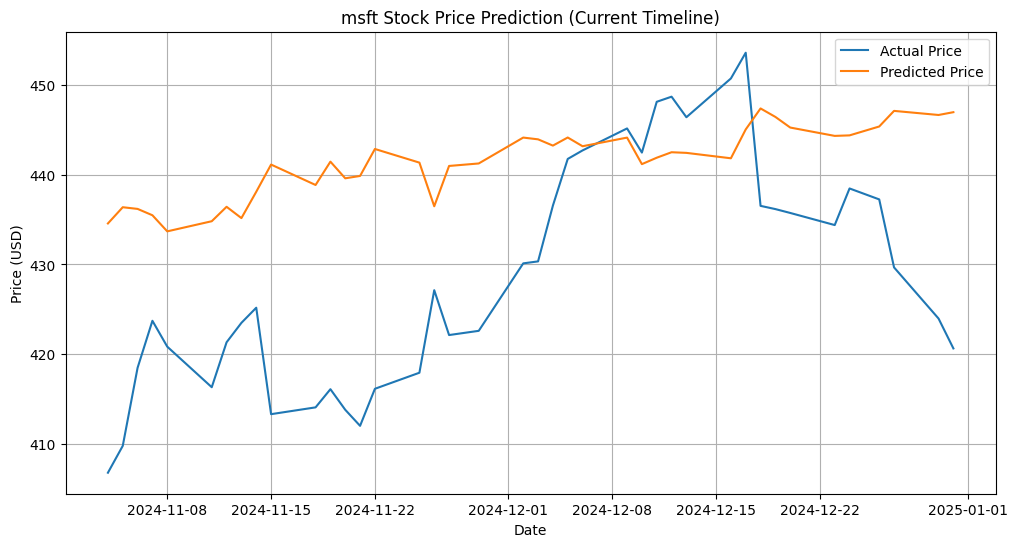

Test RMSE: 18.19
Last Prediction Date: 2024-12-31 00:00:00-05:00
Latest Prediction: 446.94


In [68]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import keras
import tensorflow as tf
from keras import Sequential
from keras import layers
import matplotlib.pyplot as plt

# Configuration
n_lags = 30  # Use past 30 days of data to predict next day
# Get full dataset
full_data = get_prices(feature_stocks + [predict_stock], start='2023-01-01', end='2025-01-01')

# Create lagged features and targets
X, y = [], []
for i in range(n_lags, len(full_data)):
    # Use past n_lags days of feature stocks to predict current day's MSFT price
    X.append(full_data[feature_stocks].iloc[i-n_lags:i].values.flatten())
    y.append(full_data[predict_stock].iloc[i])

X = np.array(X)
y = np.array(y)

train_end = '2024-06-30'
val_end = '2024-11-01'

train_idx = full_data.index <= train_end
val_idx = (full_data.index > train_end) & (full_data.index <= val_end)
test_idx = full_data.index > val_end

X_train, y_train = X[train_idx[n_lags:]], y[train_idx[n_lags:]]
X_val, y_val = X[val_idx[n_lags:]], y[val_idx[n_lags:]]
X_test, y_test = X[test_idx[n_lags:]], y[test_idx[n_lags:]]

# Scale data
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

# Build model
model = Sequential([
    layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(loss='mse')

# Train with validation
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    verbose=1
)

# Predict on test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(full_data.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(full_data.index[-len(y_test):], y_pred, label='Predicted Price')
plt.title(f'{predict_stock} Stock Price Prediction (Current Timeline)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate metrics
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f"Test RMSE: {rmse:.2f}")
print(f"Last Prediction Date: {full_data.index[-1]}")
print(f"Latest Prediction: {y_pred[-1][0]:.2f}")

# c. using different optimization algorithms

## adam

Epoch 1/100


/home/barrytan/miniconda3/envs/ANN/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.3420 - val_loss: 0.0209
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0227 - val_loss: 0.0656
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - val_loss: 0.0076
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - val_loss: 0.0253
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - val_loss: 0.0085
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - val_loss: 0.0116
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - val_loss: 0.0090
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0037 - val_loss: 0.0071
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - val_loss: 0.0095
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0035 - val_loss: 0.0080
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - val_loss: 0.0091
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0031 - val_l

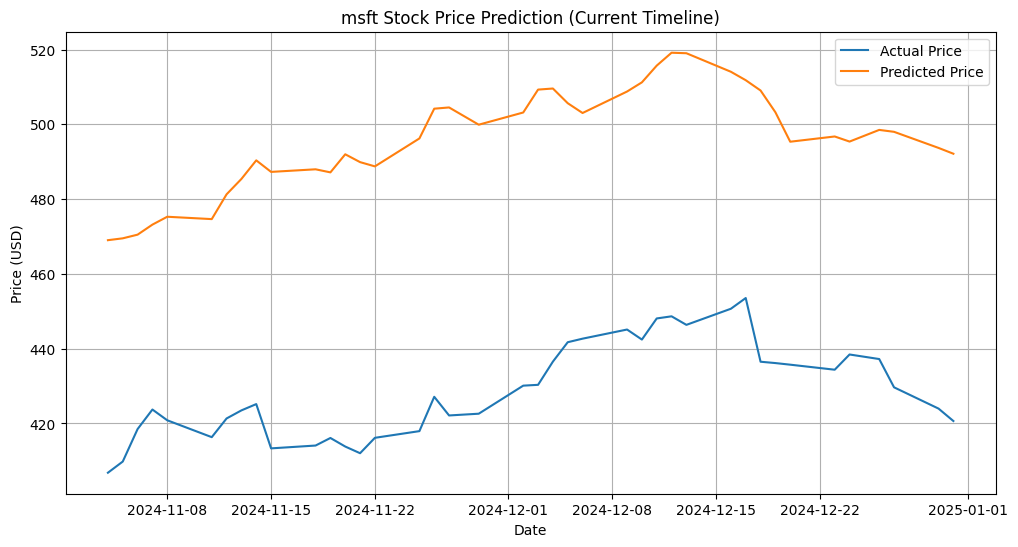

Test RMSE: 69.76
Last Prediction Date: 2024-12-31 00:00:00-05:00
Latest Prediction: 492.15


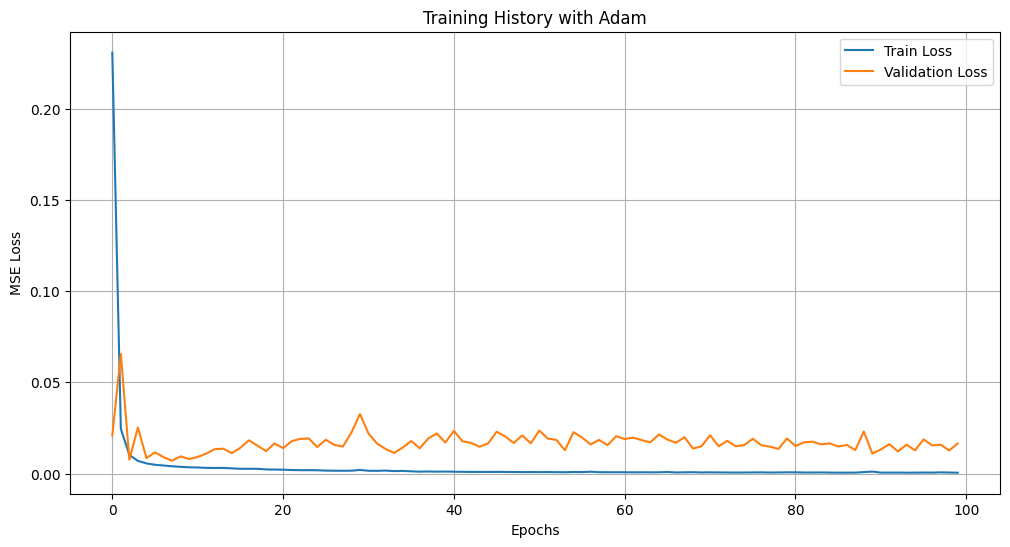

In [69]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import keras
import tensorflow as tf
from keras import Sequential
from keras import layers
import matplotlib.pyplot as plt

# Configuration
n_lags = 30  # Use past 30 days of data to predict next day
# Get full dataset
full_data = get_prices(feature_stocks + [predict_stock], start='2023-01-01', end='2025-01-01')

# Create lagged features and targets
X, y = [], []
for i in range(n_lags, len(full_data)):
    # Use past n_lags days of feature stocks to predict current day's MSFT price
    X.append(full_data[feature_stocks].iloc[i-n_lags:i].values.flatten())
    y.append(full_data[predict_stock].iloc[i])

X = np.array(X)
y = np.array(y)

train_end = '2024-06-30'
val_end = '2024-11-01'

train_idx = full_data.index <= train_end
val_idx = (full_data.index > train_end) & (full_data.index <= val_end)
test_idx = full_data.index > val_end

X_train, y_train = X[train_idx[n_lags:]], y[train_idx[n_lags:]]
X_val, y_val = X[val_idx[n_lags:]], y[val_idx[n_lags:]]
X_test, y_test = X[test_idx[n_lags:]], y[test_idx[n_lags:]]

# Scale data
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

# Build model
model = Sequential([
    layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer = 'adam', loss='mse')

# Train with validation
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    verbose=1
)

# Predict on test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(full_data.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(full_data.index[-len(y_test):], y_pred, label='Predicted Price')
plt.title(f'{predict_stock} Stock Price Prediction (Current Timeline)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate metrics
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f"Test RMSE: {rmse:.2f}")
print(f"Last Prediction Date: {full_data.index[-1]}")
print(f"Latest Prediction: {y_pred[-1][0]:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History with Adam')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

## sgd

Epoch 1/100


/home/barrytan/miniconda3/envs/ANN/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.2269 - val_loss: 0.2068
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - val_loss: 0.0487
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0140 - val_loss: 0.0293
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - val_loss: 0.0264
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0097 - val_loss: 0.0250
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - val_loss: 0.0229
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - val_loss: 0.0248
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - val_loss: 0.0216
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - val_loss: 0.0230
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - val_loss: 0.0234
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - val_loss: 0.0234
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - val_l

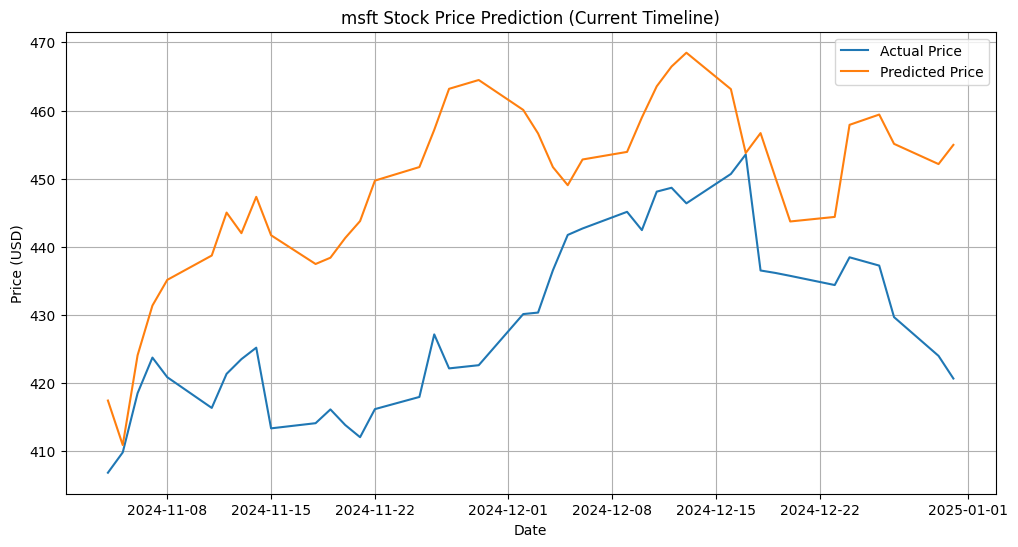

Test RMSE: 26.86
Last Prediction Date: 2024-12-31 00:00:00-05:00
Latest Prediction: 454.95


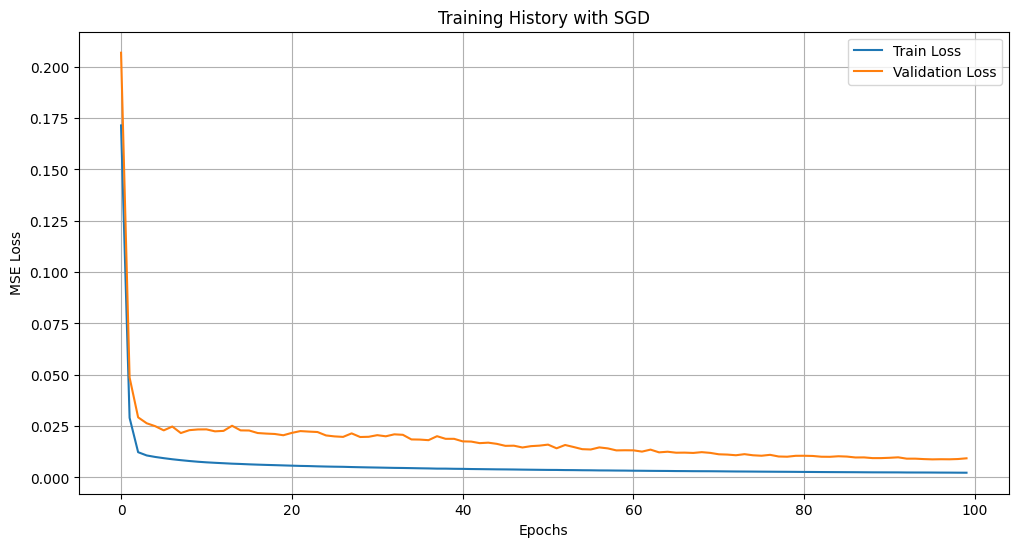

In [70]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import keras
import tensorflow as tf
from keras import Sequential
from keras import layers
import matplotlib.pyplot as plt

# Configuration
n_lags = 30  # Use past 30 days of data to predict next day
# Get full dataset
full_data = get_prices(feature_stocks + [predict_stock], start='2023-01-01', end='2025-01-01')

# Create lagged features and targets
X, y = [], []
for i in range(n_lags, len(full_data)):
    # Use past n_lags days of feature stocks to predict current day's MSFT price
    X.append(full_data[feature_stocks].iloc[i-n_lags:i].values.flatten())
    y.append(full_data[predict_stock].iloc[i])

X = np.array(X)
y = np.array(y)

train_end = '2024-06-30'
val_end = '2024-11-01'

train_idx = full_data.index <= train_end
val_idx = (full_data.index > train_end) & (full_data.index <= val_end)
test_idx = full_data.index > val_end

X_train, y_train = X[train_idx[n_lags:]], y[train_idx[n_lags:]]
X_val, y_val = X[val_idx[n_lags:]], y[val_idx[n_lags:]]
X_test, y_test = X[test_idx[n_lags:]], y[test_idx[n_lags:]]

# Scale data
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

# Build model
model = Sequential([
    layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer = 'sgd', loss='mse')

# Train with validation
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=100,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    verbose=1
)

# Predict on test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(full_data.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(full_data.index[-len(y_test):], y_pred, label='Predicted Price')
plt.title(f'{predict_stock} Stock Price Prediction (Current Timeline)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate metrics
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f"Test RMSE: {rmse:.2f}")
print(f"Last Prediction Date: {full_data.index[-1]}")
print(f"Latest Prediction: {y_pred[-1][0]:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History with SGD')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

## Momentum


Epoch 1/150


/home/barrytan/miniconda3/envs/ANN/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.3100 - val_loss: 0.2150
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0770 - val_loss: 0.0071
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0249 - val_loss: 0.0574
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0335 - val_loss: 0.0090
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - val_loss: 0.0474
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0195 - val_loss: 0.0201
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - val_loss: 0.0050
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - val_loss: 0.0049
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - val_loss: 0.0067
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - val_loss: 0.0089
Epoch 11/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - val_loss: 0.0051
Epoch 12/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0047 - val_l

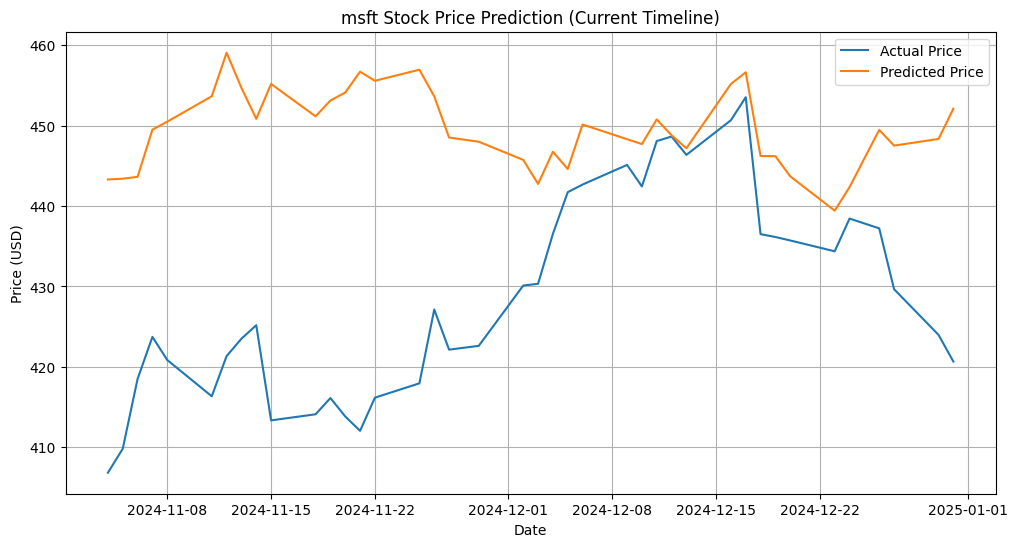

Test RMSE: 24.72
Last Prediction Date: 2024-12-31 00:00:00-05:00
Latest Prediction: 452.12


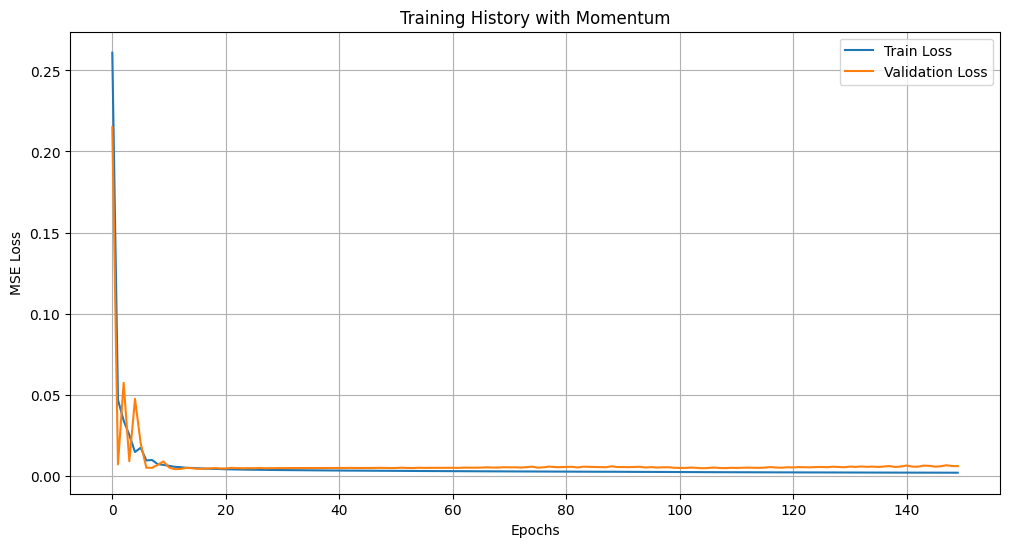

In [71]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import keras
import tensorflow as tf
from keras import Sequential
from keras import layers
import matplotlib.pyplot as plt

# Configuration
n_lags = 30  # Use past 30 days of data to predict next day
# Get full dataset
full_data = get_prices(feature_stocks + [predict_stock], start='2023-01-01', end='2025-01-01')

# Create lagged features and targets
X, y = [], []
for i in range(n_lags, len(full_data)):
    # Use past n_lags days of feature stocks to predict current day's MSFT price
    X.append(full_data[feature_stocks].iloc[i-n_lags:i].values.flatten())
    y.append(full_data[predict_stock].iloc[i])

X = np.array(X)
y = np.array(y)

train_end = '2024-06-30'
val_end = '2024-11-01'

train_idx = full_data.index <= train_end
val_idx = (full_data.index > train_end) & (full_data.index <= val_end)
test_idx = full_data.index > val_end

X_train, y_train = X[train_idx[n_lags:]], y[train_idx[n_lags:]]
X_val, y_val = X[val_idx[n_lags:]], y[val_idx[n_lags:]]
X_test, y_test = X[test_idx[n_lags:]], y[test_idx[n_lags:]]

# Scale data
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

# Build model
model = Sequential([
    layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='linear')
])

optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.95, nesterov= False)
model.compile(optimizer = optimizer, loss='mse')

# Train with validation
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=150,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    verbose=1
)

# Predict on test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(full_data.index[-len(y_test):], y_test, label='Actual Price')
plt.plot(full_data.index[-len(y_test):], y_pred, label='Predicted Price')
plt.title(f'{predict_stock} Stock Price Prediction (Current Timeline)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate metrics
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f"Test RMSE: {rmse:.2f}")
print(f"Last Prediction Date: {full_data.index[-1]}")
print(f"Latest Prediction: {y_pred[-1][0]:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History with Momentum')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# d. learning rate schedulers

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import keras
import tensorflow as tf
from keras import Sequential
from keras import layers
import matplotlib.pyplot as plt


class CyclicLR(keras.callbacks.Callback):
    def __init__(self, base_lr=0.001, max_lr=0.006, step_size=2000.):
        super().__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.trn_iterations = 0
        
    def clr(self):
        cycle = np.floor(1 + self.trn_iterations / (2 * self.step_size))
        x = np.abs(self.trn_iterations / self.step_size - 2 * cycle + 1)
        return self.base_lr + (self.max_lr - self.base_lr) * np.maximum(0, (1 - x))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = self.model.optimizer.learning_rate.numpy()  

    def on_batch_end(self, batch, logs={}):
        self.trn_iterations += 1
        self._update_lr(self.clr())

    def _update_lr(self, lr):
        self.model.optimizer.learning_rate.assign(lr)  


class OneCycleLR(keras.callbacks.Callback):
    def __init__(self, max_lr=0.006, total_steps=10000, pct_start=0.3):
        super().__init__()
        self.max_lr = max_lr
        self.total_steps = total_steps
        self.pct_start = pct_start
        self.step_num = 0
        
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = self.model.optimizer.learning_rate.numpy() 

    def on_train_begin(self, logs=None):
        self.anneal_steps = int(self.total_steps * self.pct_start)
        self.low_lr = self.max_lr / 10
        self.high_lr = self.max_lr

    def on_train_batch_begin(self, batch, logs=None):
        if self.step_num < self.anneal_steps:
            lr = self.low_lr + (self.high_lr - self.low_lr) * (self.step_num / self.anneal_steps)
        else:
            lr = self.high_lr - (self.high_lr - self.low_lr) * (
                (self.step_num - self.anneal_steps) / (self.total_steps - self.anneal_steps))
        self.model.optimizer.learning_rate.assign(lr)  
        self.step_num += 1


class LRSchedulerLogger(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = self.model.optimizer.learning_rate.numpy()


# Configuration
n_lags = 30  # Use past 30 days of data to predict next day
# Get full dataset
full_data = get_prices(feature_stocks + [predict_stock], start='2023-01-01', end='2025-01-01')

# Create lagged features and targets
X, y = [], []
for i in range(n_lags, len(full_data)):
    # Use past n_lags days of feature stocks to predict current day's MSFT price
    X.append(full_data[feature_stocks].iloc[i-n_lags:i].values.flatten())
    y.append(full_data[predict_stock].iloc[i])

X = np.array(X)
y = np.array(y)

train_end = '2024-06-30'
val_end = '2024-11-01'

train_idx = full_data.index <= train_end
val_idx = (full_data.index > train_end) & (full_data.index <= val_end)
test_idx = full_data.index > val_end

X_train, y_train = X[train_idx[n_lags:]], y[train_idx[n_lags:]]
X_val, y_val = X[val_idx[n_lags:]], y[val_idx[n_lags:]]
X_test, y_test = X[test_idx[n_lags:]], y[test_idx[n_lags:]]

# Scale data
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

# Build model
model = Sequential([
    layers.Dense(20, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Configure optimizer
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.95)
model.compile(optimizer=optimizer, loss='mse')

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

cyclic_lr = CyclicLR(
    base_lr=0.001,
    max_lr=0.006,
    step_size=2000
)

onecycle_lr = OneCycleLR(
    max_lr=0.006,
    total_steps=150*len(X_train_scaled)//32  # epochs * steps_per_epoch
)


/home/barrytan/miniconda3/envs/ANN/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### OneCycleLR


Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - loss: 0.3423 - val_loss: 0.5211 - lr: 7.1180e-04
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2191 - val_loss: 0.2544 - lr: 8.3478e-04
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0794 - val_loss: 0.0444 - lr: 9.5776e-04
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0287 - val_loss: 0.0089 - lr: 0.0011
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0415 - val_loss: 0.0068 - lr: 0.0012
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0280 - val_loss: 0.0234 - lr: 0.0013
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0239 - val_loss: 0.0350 - lr: 0.0014
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0201 - val_loss: 0.0148 - lr: 0.0016
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - val_loss: 0.0066 - lr: 0.0017
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - val_loss: 0.0067 - lr: 0.0018
Epoch

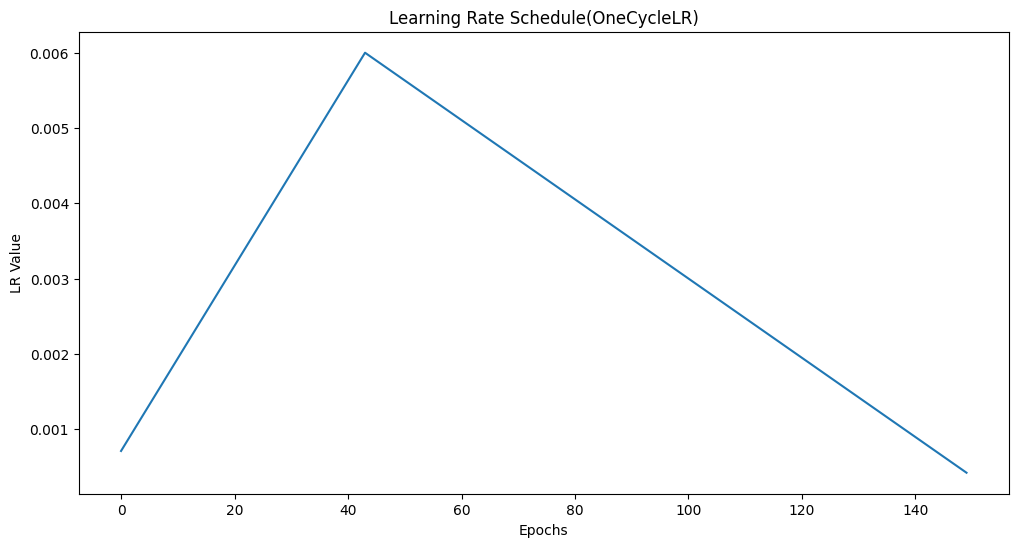

In [73]:
# Train with chosen scheduler
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=150,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[onecycle_lr],  
    verbose=1
)

# After training, plot using epoch-level LR values
plt.figure(figsize=(12, 6))
plt.plot(history.history['lr'], label='Learning Rate')
plt.title('Learning Rate Schedule(OneCycleLR)')
plt.xlabel('Epochs')
plt.ylabel('LR Value')
plt.show()

### CyclicLR


Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.1718e-04 - val_loss: 0.0162 - lr: 0.0052
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.2855e-04 - val_loss: 0.0200 - lr: 0.0052
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8445e-04 - val_loss: 0.0153 - lr: 0.0052
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.3629e-04 - val_loss: 0.0196 - lr: 0.0052
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5860e-04 - val_loss: 0.0159 - lr: 0.0053
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.9076e-04 - val_loss: 0.0184 - lr: 0.0053
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.2059e-04 - val_loss: 0.0179 - lr: 0.0053
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.1672e-04 - val_loss: 0.0162 - lr: 0.0053
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.2431e-04 - val_loss: 0.0204 - lr: 0.0054
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.8142e-04 - val_lo

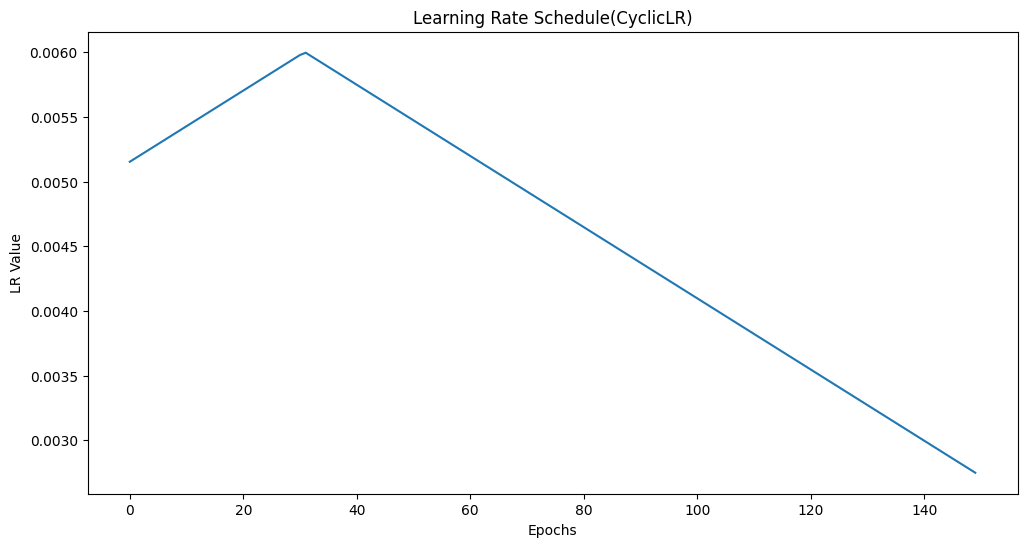

In [78]:
# Train with chosen scheduler
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=150,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[cyclic_lr],  
    verbose=1
)

# After training, plot using epoch-level LR values
plt.figure(figsize=(12, 6))
plt.plot(history.history['lr'], label='Learning Rate')
plt.title('Learning Rate Schedule(CyclicLR)')
plt.xlabel('Epochs')
plt.ylabel('LR Value')
plt.show()

### ReduceLROnPlateau


Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8866e-04 - val_loss: 0.0191 - learning_rate: 0.0027 - lr: 0.0027
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.7676e-04 - val_loss: 0.0197 - learning_rate: 0.0027 - lr: 0.0027
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8786e-04 - val_loss: 0.0192 - learning_rate: 0.0027 - lr: 0.0027
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.8266e-04 - val_loss: 0.0189 - learning_rate: 0.0027 - lr: 0.0027
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6455e-04 - val_loss: 0.0200 - learning_rate: 0.0027 - lr: 0.0027
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8680e-04 - val_loss: 0.0180 - learning_rate: 0.0027 - lr: 0.0027
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4341e-04 - val_loss: 0.0210 - learning_rate: 0.0027 - lr: 0.0027
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.0124e-04 - val_loss: 0.0179 - learning_rate: 0.0027 - lr:

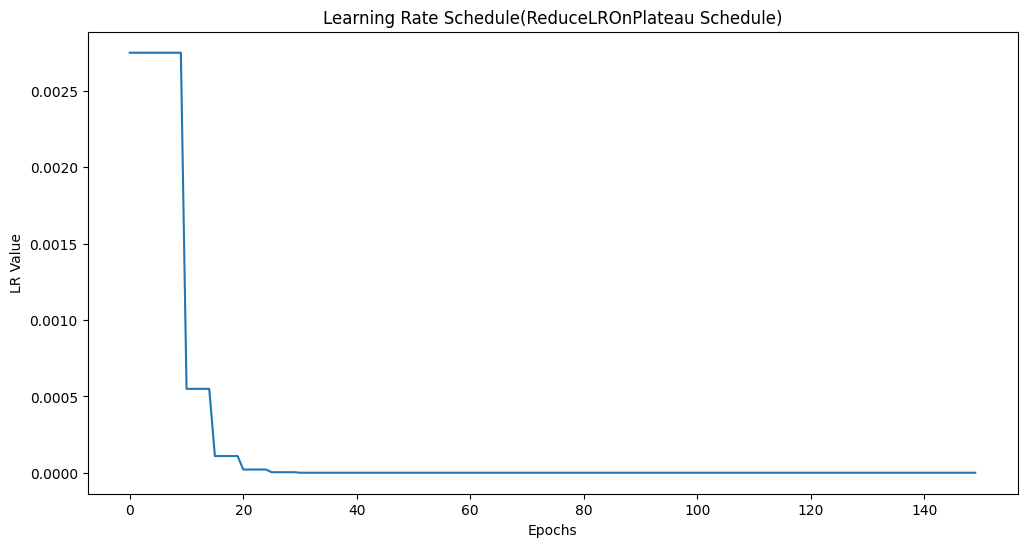

In [79]:
# Train with BOTH callbacks
history = model.fit(
    X_train_scaled,
    y_train_scaled,
    epochs=150,
    batch_size=32,
    validation_data=(X_val_scaled, y_val_scaled),
    callbacks=[reduce_lr, LRSchedulerLogger()],  # Add both
    verbose=1
)

plt.figure(figsize=(12, 6))
plt.plot(history.history['lr'], label='Learning Rate')
plt.title('Learning Rate Schedule(ReduceLROnPlateau Schedule)')
plt.xlabel('Epochs')
plt.ylabel('LR Value')
plt.show()